#### Import Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')


#### Loading The Dataset

In [4]:
housing=pd.read_csv('BostonHousing.csv')
df=pd.DataFrame(housing)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


#### Preprocessing The Data

In [8]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [9]:
hp=df['rm'].mean()
df['rm'].fillna(hp, inplace=True)


In [10]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [11]:
print(df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Length: 506, dtype: bool


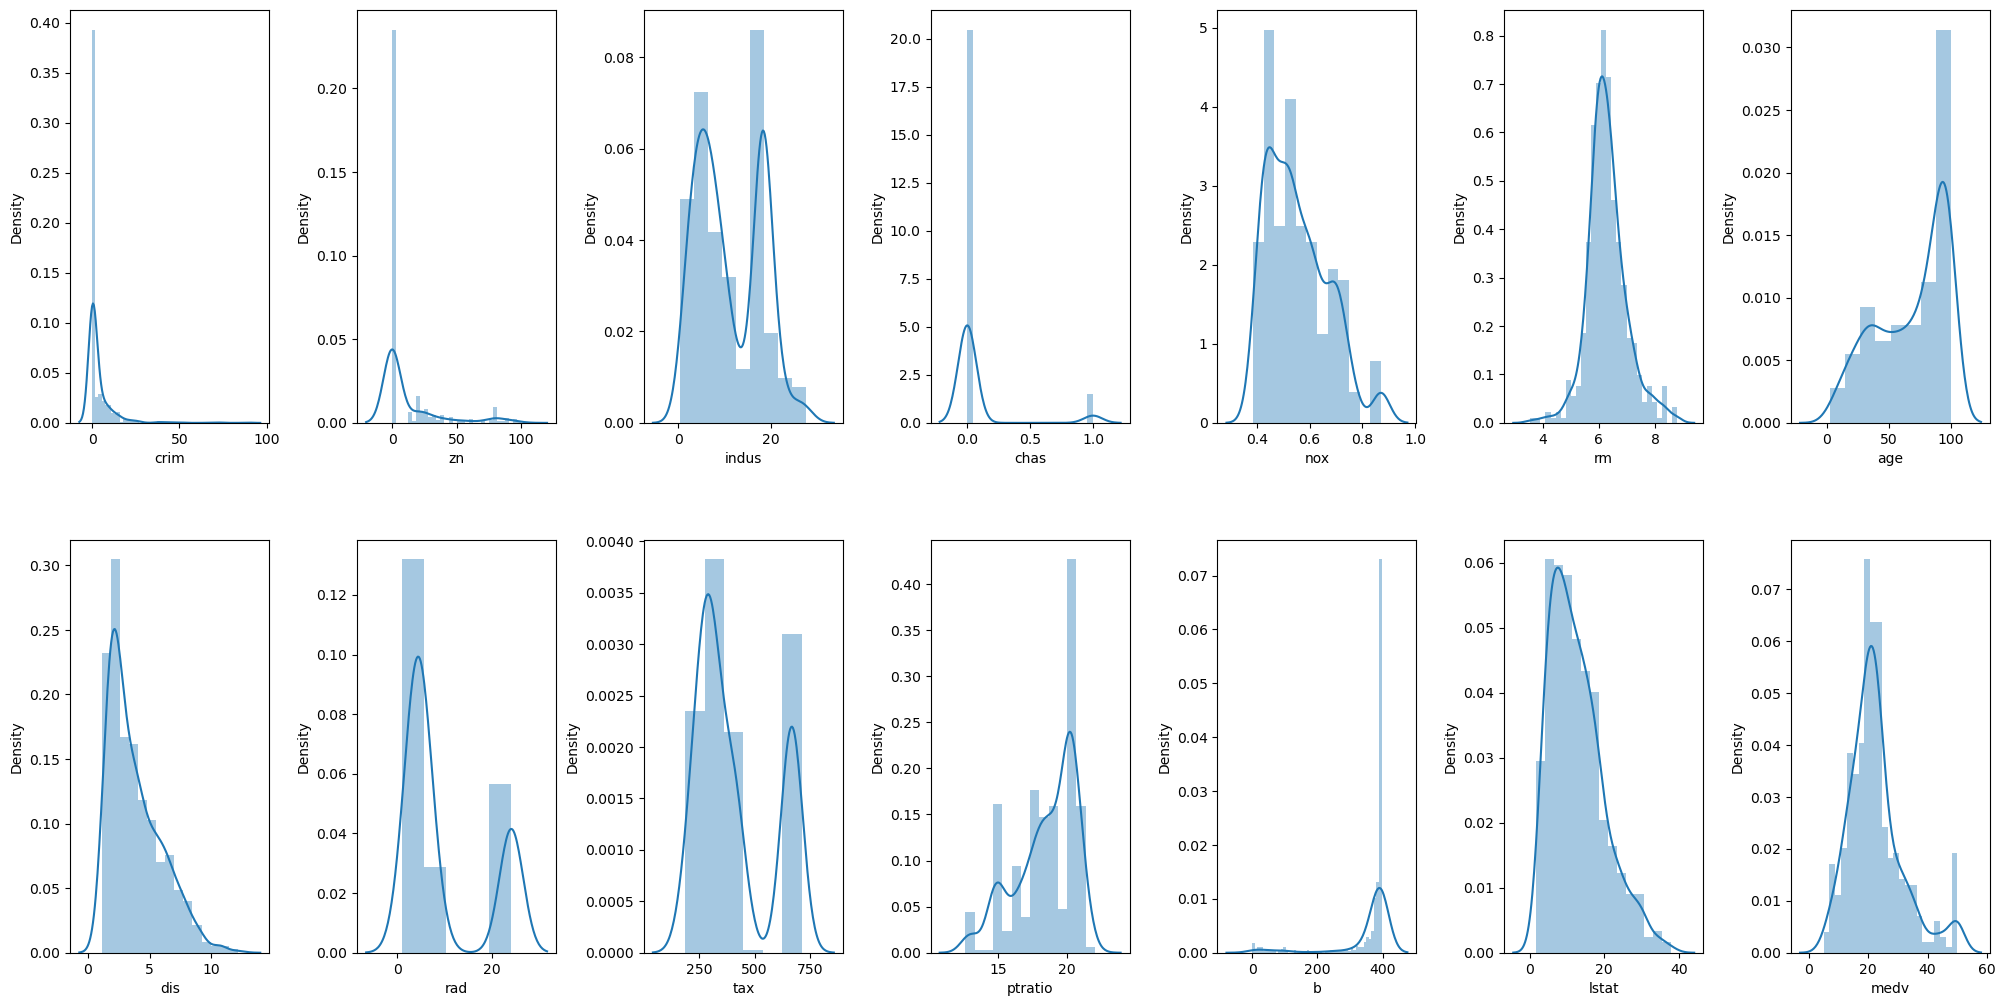

In [13]:
fig, ax=plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index=0
ax=ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

#### Analyzing Correalted Features

In [15]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219261,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.310847,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.392052,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091434,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302051,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219261,0.310847,-0.392052,0.091434,-0.302051,1.000000,-0.239632,0.202268,-0.210353,-0.292178,-0.356065,0.127998,-0.614526,0.695375
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.239632,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.202268,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.210353,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292178,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

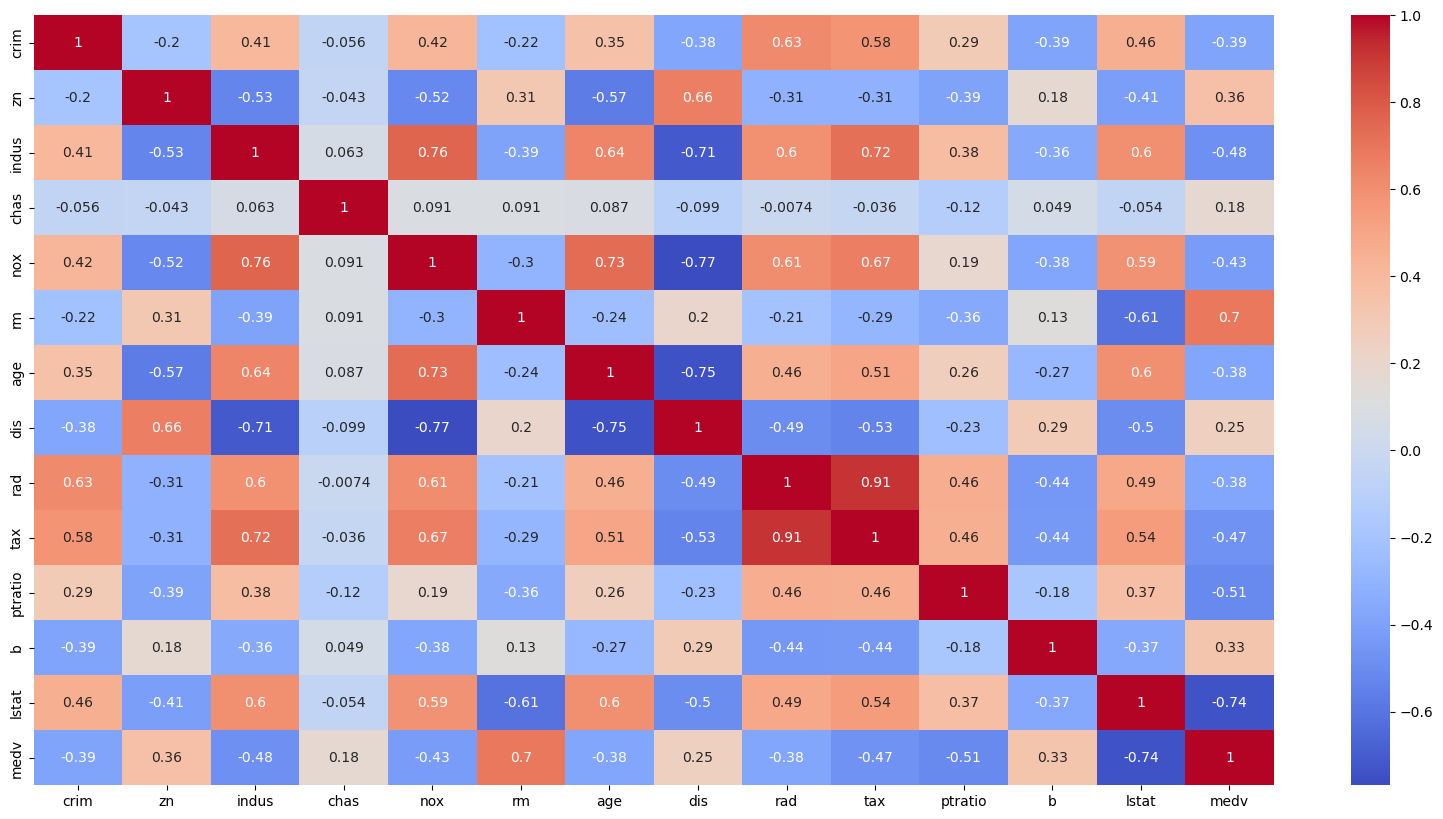

In [16]:
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True, cmap='coolwarm')

Text(0, 0.5, 'Price')

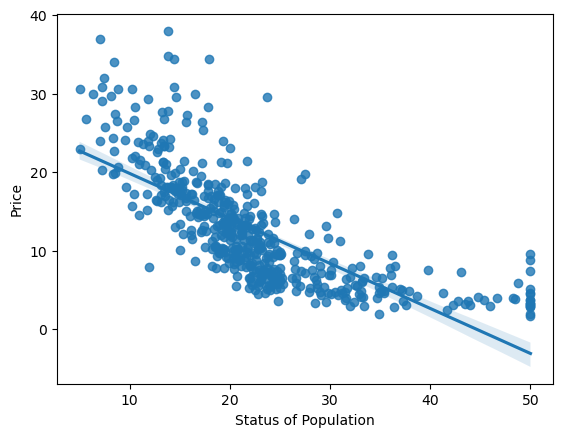

In [17]:
sns.regplot(y=df['lstat'], x=df['medv'])
plt.xlabel('Status of Population')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

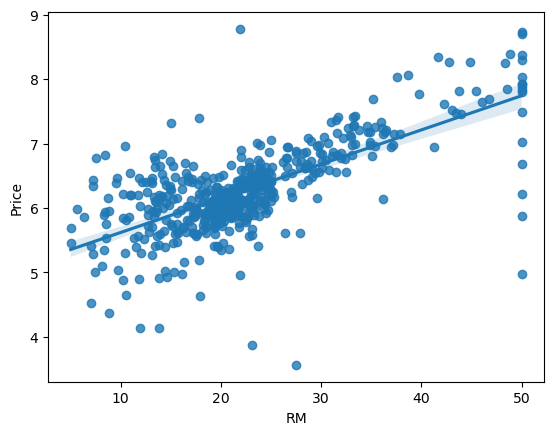

In [18]:
sns.regplot(y=df['rm'], x=df['medv'])
plt.xlabel('RM')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

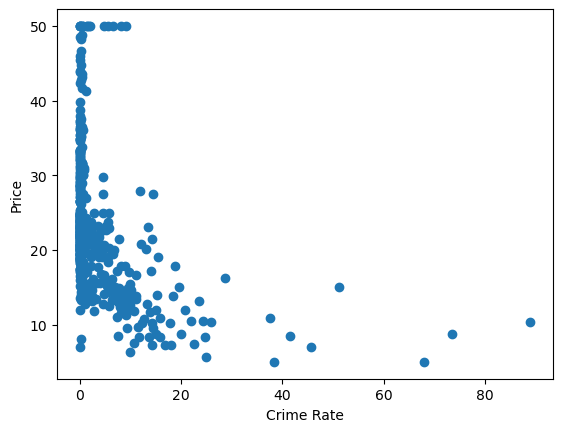

In [19]:
plt.scatter(df['crim'], df['medv'])
plt.xlabel('Crime Rate')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

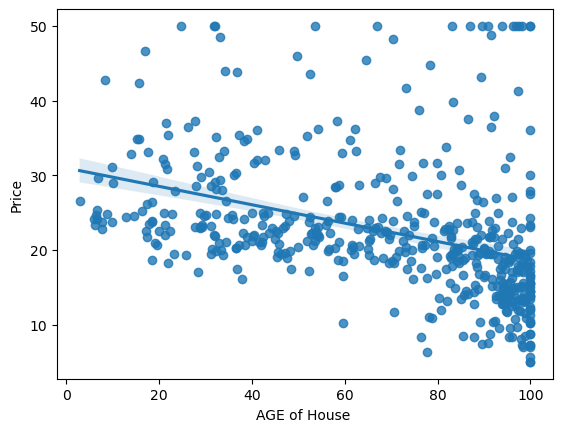

In [20]:
sns.regplot(x='age', y='medv', data=df)
plt.xlabel('AGE of House ')
plt.ylabel('Price')

Text(0, 0.5, 'Tax')

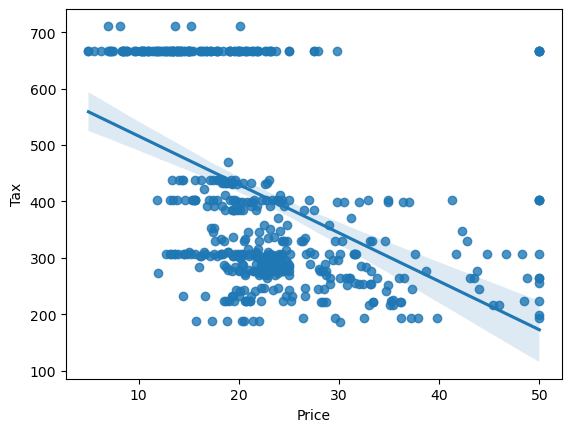

In [21]:
sns.regplot(x=df['medv'], y=df['tax'])
plt.xlabel('Price')
plt.ylabel('Tax')

#### Model Training

In [24]:
x=df.iloc[:, [0,1,5,6,9]]
y=df.iloc[:,-1]

In [25]:
x

,crim,zn,rm,age,tax
0,0.00632,18.0,6.575,65.2,296
1,0.02731,0.0,6.421,78.9,242
2,0.02729,0.0,7.185,61.1,242
3,0.03237,0.0,6.998,45.8,222
4,0.06905,0.0,7.147,54.2,222
...,...,...,...,...,...
501,0.06263,0.0,6.593,69.1,273
502,0.04527,0.0,6.120,76.7,273
503,0.06076,0.0,6.976,91.0,273
504,0.10959,0.0,6.794,89.3,273


In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=42)

In [27]:
x_train

,crim,zn,rm,age,tax
5,0.02985,0.0,6.430,58.7,222
116,0.13158,0.0,6.176,72.5,432
45,0.17142,0.0,5.682,33.8,233
16,1.05393,0.0,5.935,29.3,307
468,15.57570,0.0,5.926,71.0,666
...,...,...,...,...,...
106,0.17120,0.0,5.836,91.9,384
270,0.29916,20.0,5.856,42.1,223
348,0.01501,80.0,6.635,29.7,280
435,11.16040,0.0,6.629,94.6,666


In [28]:
x_test

,crim,zn,rm,age,tax
173,0.09178,0.0,6.416,84.1,296
274,0.05644,40.0,6.758,32.9,254
491,0.10574,0.0,5.983,98.8,711
72,0.09164,0.0,6.065,7.8,305
452,5.09017,0.0,6.297,91.8,666
...,...,...,...,...,...
441,9.72418,0.0,6.406,97.2,666
23,0.98843,0.0,5.813,100.0,307
225,0.52693,0.0,8.725,83.0,307
433,5.58107,0.0,6.436,87.9,666


In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [30]:
x_train=scaler.fit_transform(x_train)


In [31]:
x_test=scaler.transform(x_test)

In [32]:
x_train

array([[-0.41425879, -0.50512499,  0.14403812, -0.365584  , -1.11279004],
       [-0.40200818, -0.50512499, -0.20979793,  0.13394078,  0.15008778],
       [-0.39721053, -0.50512499, -0.89796727, -1.26690045, -1.0466393 ],
       ...,
       [-0.41604586,  3.03838247,  0.42961447, -1.41530998, -0.76399522],
       [ 0.92611293, -0.50512499,  0.42125613,  0.93390438,  1.5572945 ],
       [-0.39030549, -0.50512499,  0.10921174,  0.60088786, -0.13857001]])

<Axes: title={'center': 'Model Coefficients'}>

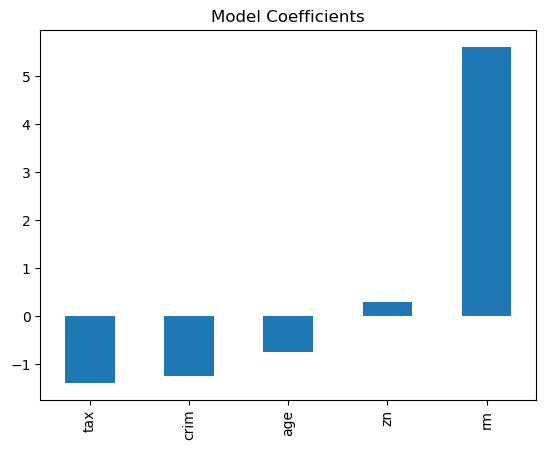

In [33]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(x_train, y_train)

coef=pd.Series(regression.coef_, x.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

In [34]:
regression.coef_

array([-1.25885833,  0.29196722,  5.61063882, -0.74954927, -1.39250348])

In [35]:
regression.intercept_

23.01581920903955

In [36]:
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [37]:
#Prediction with Test Data
pred=regression.predict(x_test)
pred

array([24.59392355, 29.53048211, 17.3334194 , 23.84534038, 19.59876286,
       22.92796947, 20.59341749, 21.23378234, 19.25656632, 20.85726507,
       20.86095318, 21.34910205, -0.68368619, 23.13179396, 19.37237565,
       25.66083125, 20.98271324,  6.89983415, 38.80067729, 17.89356946,
       25.91714873, 27.39145252, 18.5783797 , 26.58134316, 16.93642031,
       12.25165529, 20.79348895, 22.2344504 , 20.95937923, 19.27638222,
       17.87071901, 25.59874614, 25.17324399, 12.38553306, 17.32887248,
       17.46944222, 31.69038268, 21.95584429, 22.67343447, 25.27989067,
       16.05312644, 29.40552778, 40.49875384, 19.19725105, 25.31465074,
       14.60939113, 18.45700009, 26.62961838, 18.90670938, 26.59518457,
       21.47754637, 31.11766924, 21.9811189 , 27.05368671, 34.14515941,
       21.01329408, 18.67929061, 31.06708989, 25.77892563, 18.61703653,
       25.08768613, 34.55421441, 27.21287862, 18.1795008 , 26.99045221,
       15.89082091, 20.21904017, 25.56833323, 29.03139604, 17.25

In [38]:
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('R-Squared:', r2_score(y_test,pred))

Mean Squared Error: 30.688931347875183
R-Squared: 0.5881404320409223


Text(0, 0.5, 'Predicted Price')

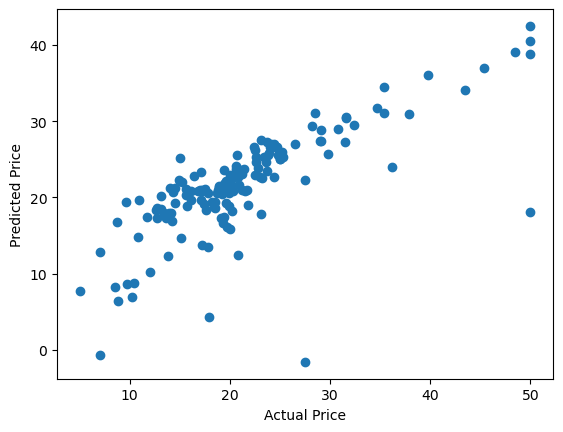

In [39]:
plt.scatter(y_test, pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

Text(0, 0.5, 'Predicted Price')

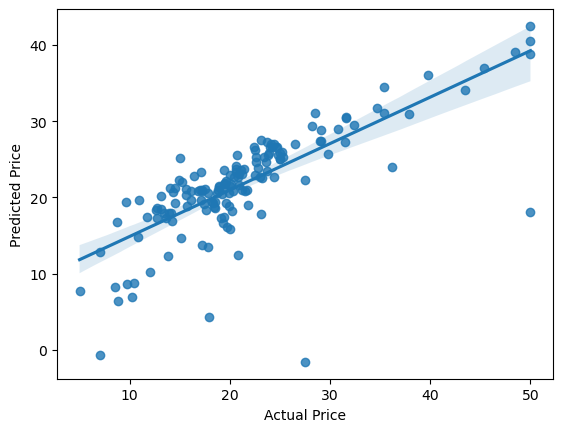

In [40]:
sns.regplot(x=y_test, y=pred, data=df)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

Text(0.0, 1.0, 'House Price Prediction Plot')

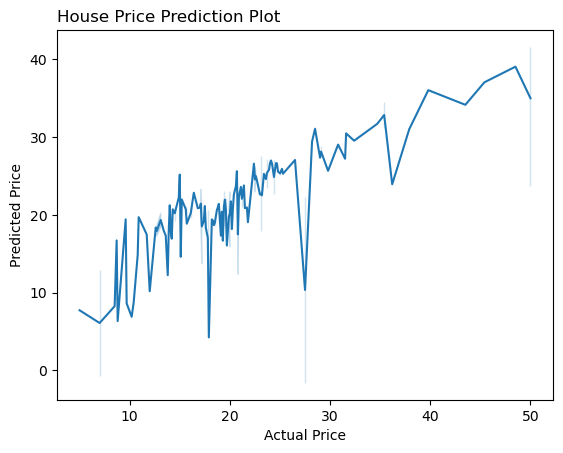

In [46]:
sns.lineplot(x=y_test, y=pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('House Price Prediction Plot', loc='left')